![Coverpage](cover-page.jpg)

### Project ECE 428
#### Maximilian Schnitker
##### 3/23/2018

**Title**:

Bus Recognition for a Lazy Cause *(The Non-Lazy Way)*

**Introduction:**


I have been late many times for the bus near my house. I had an idea to use python and a webcam to identify the bus on it's route and notify me when the bus is on it's way or close. I will be using this project as the first step to this side project of mine. I hope this project will give me the experience I need to complete the overall application.

**Plan:**

I will be using a picture/video(maybe) of public bus that has a route around my house. I will be using python to upload the image and use a few different methods to process the image(s) and identify if the bus is in the image. I will do this by taking the image and turning it into an array if it is not already one. I will try a few ideas of processing a background to make a mask and edge detection to "see" when the bus is in frame. I will apply a filter that will make the image grayscale and use canny edge detection and OpenCV to get two different results with edge detection. If I am able to achive this in good time I will attempt to make a variable that can “flag” when the program has detected the bus and also when it has not. I will try to research different methods if one doesn't work and if they both work I may identify the amount of time each method takes to complete or process a certain number of pictures.


**Referances:**

- http://docs.python-guide.org/en/latest/scenarios/imaging/

- I will also be using a website called Stack Overflow: https://stackoverflow.com/

- IEEE Paper on image processing with python: http://ieeexplore.ieee.org/xpls/icp.jsp?arnumber=7511766

- Youtube

- https://en.wikipedia.org/wiki/Canny_edge_detector

- https://pythonprogramming.net/haar-cascade-object-detection-python-opencv-tutorial/ 

- https://docs.opencv.org/3.1.0/d7/d8b/tutorial_py_face_detection.html

- https://github.com/tensorflow

**It starts:..**

I will begin with baby steps: Importing an image<br/>This image is a picture of a public bus that I will be trying to identify the edges. I will be using a gaussian blur to reduce the noise in the image. This can be represented by a matrix from the equation $$\frac{1}{2\pi\sigma^2}exp\left(-\frac{(i-(k+1))^2+(j-(k+1))^2}{2\sigma^2}\right)$$<br/>
$$For \ i\geq1, j \leq(2k+1)$$

##### First thoughts versus real work

I first decided to work with the actual numbers a matricies to gray and blur an image with a color mask and a gaussian blur. I would then use a Canny filter matrix and convolve that with my image to get some lines on the edges. Once I started looking to this method I found that it would be impractical for this project due to the background code and knowledge of python's inworkings that I do not have at the moment. The begining gaussian and other blur methods can be seen in the cell below. 

I then realized that I could use OpenCV to help with all the preliminary coding that needed to be done before I could focus on the object detection.

##### Original Bluring
The code above create the variable img that will be the image of a bus that I will be starting with. I will then take this picture and use a blurring technique to reduce the noise in the image and make a image detecktion easier. There are two kinds of blurring type I would to try in this project, The *Gaussian blur* and the *Median blur*.<br/><br/>**Gaussian Blur** <br/> This type of image processing uses a kernal matrices of sizes varying from 3 to 15 and in some cases they can be larger. An example of a $5X5$ Gaussian filter would be : $$B = \frac{1}{159}\begin{bmatrix} 2&4&5&4&2 \\ 4&9&12&9&4 \\ 5&12&15&12&5 \\ 4&9&12&9&4 \\ 2&4&5&4&2 \end{bmatrix}$$<br/>This 'B' filter is then convolved with the image and is to be blurred. The GaussianBlur does this but with a 15x15 matrix. <br/>This image now looks like this after Gaussian blur:
![Step_one](bus_gauss.jpg)

Then after the median blur:
![Step_one,con't](bus_median.jpg)

##### OpenCV

I immediately downloaded the the libraries and packages needed to run OpenCv using the pip native installer. Using OpenCV I was able to read the images much easier and also alter them vary effectively. I used this idea to try to alter the colors of the image to make identifying the bus easier, (basically making a mask). This was able to be done but I was also able to just apply an edge detection to the picture in question without too much processing and the edges worked well.

![Opencv_mask](bus_pos_small.jpg)

![Opencv_mask](bus_pos_thresh.jpg)

![Opencv_canny](bus_pos_canny2.jpg)

(640, 480, 3)
[214 161 132]


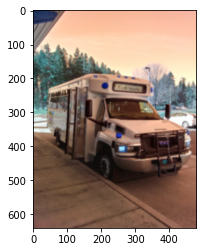

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('bus_pos1.jpg')
img2 = cv2.imread('bus_pos2.jpg')
small = cv2.resize(img, dsize=(480,640), interpolation = cv2.INTER_CUBIC)
small2 = cv2.resize(img2, dsize=(480,640), interpolation = cv2.INTER_CUBIC)
##### USING CV2 TO IMPORT AN IMAGE AND MAKING IS GRAYSCALE FOR SIMPLICITY #####
#img_gauss = cv2.GaussianBlur(img, (55,55),0)
print(small2.shape)

#rows,cols = small.shape
#roi = img_gauss[0:rows,0:cols]

#small2gray  = cv2.cvtColor(small, cv2.COLOR_BGR2GRAY)

ret, threshold =cv2.threshold(small2, 54,255, cv2.THRESH_BINARY)
#ret, mask =cv2.threshold(small2, 190,255, cv2.THRESH_TOZERO)
cv2.imshow('original',small2)
cv2.imshow('thresh', threshold)

cv2.waitKey(0)
cv2.destroyAllWindows()
#tESTING A PIXLE#
px = small2[190,200]
print(px)
#cv2.imshow('mask' , mask)

lower_white = np.array([0,0,0])
upper_white = np.array([255,255,255])

#mask = cv2.inrange(hsv, lower_white, upper_white)
#res = cv2.bitwise_and(smaller, smaller, mask = mask)

#cv2.imshow('image', smaller)


plt.imshow(small2, interpolation = 'bicubic')
plt.show()
#cv2.imwrite('bus_pos_small2.jpg', small)

Now we can apply our edge detection to each of these filtered pictures to come up with the best overall edge detection. I will be using the canny edge detection method for the time being. In the cell below I am aplpying a canny filter to a resized image of the original picture. The Canny edge detection works by applying kernal, (matrix), and finding the intensity gradient of the object an edge in an image may point in a variety of directions, so the Canny algorithm uses four filters to detect horizontal, vertical and diagonal edges in the blurred image. The edge detection operator (such as Roberts, Prewitt, or Sobel) returns a value for the first derivative in the horizontal direction (Gx) and the vertical direction (Gy). From this the edge gradient and direction can be determined:
$$G = \sqrt{G_x^2+G_y^2}$$ and $$\theta = atan2(G_y,G_x)$$
where G can be computed using the hypot function and atan2 is the arctangent function with two arguments. The edge direction angle is rounded to one of four angles representing vertical, horizontal and the two diagonals (0°, 45°, 90° and 135°). An edge direction falling in each color region will be set to a specific angle values, for instance θ in [0°, 22.5°] or [157.5°, 180°] maps to 0°. We would then apply a double threshold where after the optional application of non-maximum suppression, remaining edge pixels provide a more accurate representation of real edges in an image. However, some edge pixels remain that are caused by noise and color variation. In order to account for these spurious responses, it is essential to filter out edge pixels with a weak gradient value and preserve edge pixels with a high gradient value. This is accomplished by selecting high and low threshold values. If an edge pixel’s gradient value is higher than the high threshold value, it is marked as a strong edge pixel. If an edge pixel’s gradient value is smaller than the high threshold value and larger than the low threshold value, it is marked as a weak edge pixel. If an edge pixel's value is smaller than the low threshold value, it will be suppressed. The two threshold values are empirically determined and their definition will depend on the content of a given input image. Finaly I would preform edge tracking by hysteresis. So far, the strong edge pixels should certainly be involved in the final edge image, as they are extracted from the true edges in the image. However, there will be some debate on the weak edge pixels, as these pixels can either be extracted from the true edge, or the noise/color variations. To achieve an accurate result, the weak edges caused by the latter reasons should be removed. Usually a weak edge pixel caused from true edges will be connected to a strong edge pixel while noise responses are unconnected. To track the edge connection, blob analysis is applied by looking at a weak edge pixel and its 8-connected neighborhood pixels. As long as there is one strong edge pixel that is involved in the blob, that weak edge point can be identified as one that should be preserved.

Upon reading how this is done I decided to move to the much qucker method of utilizing OpenCV to process my image for me.

In [ ]:
edges2 = cv2.Canny(small2, 50,100)

cv2.imshow('edges', edges2)
cv2.waitKey(0)
cv2.destroyAllWindows()

#cv2.imwrite('bus_pos_canny2.jpg', edges2)

##### OpenCV Continued 

As soon as I got the entire image resized and filtered I found that there is a program in OpenCV that uses HaarCascades to identify objects in images. I used a test case for face and eyes to make sure my process would work. I then looked into the availability of a Haar Cascade for a  bus and if I needed to make one myself, (I looked here: https://www.cs.auckland.ac.nz/~m.rezaei/Tutorials/Creating_a_Cascade_of_Haar-Like_Classifiers_Step_by_Step.pdf).

Haar Cascades use multiple features that look loike black and white blocks placed on the image. The pixles underneath the image are then counted using an integral image. This is a way of processing an image and getting a summed area table. The OpenCV program takes the number of pixles in a certain are and dimplifies them down to a computation of just four pixles. This allows OpenCV to compute and process images very quickly.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# multiple cascades: https://github.com/Itseez/opencv/tree/master/data/haarcascades

#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_eye.xml
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

cap = cv2.VideoCapture(0)

while 1:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 2)

    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

    cv2.imshow('img',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

Then I found a already made Cascade for busses which is the Haar Cascade I will be using as of right now. I used the excisting Haar cascade to help detect my bus. The bus_cascade.detectMultiScale() variable returns an array of the location(s) of the detected objects in the frame. I took that array and compared it's length when a bus was identified and when it was not. I found that I could then determine automaticaly when a bus had been detected. I used the output to print a  message telling me if the bus was or was not there. 

In [4]:
cascade_src = 'Bus_front.xml'

frame = cv2.imread('bus_pos_small.jpg')
fgbg = cv2.createBackgroundSubtractorMOG2()
bus_cascade = cv2.CascadeClassifier(cascade_src)


while True:
    img = frame
    fgbg.apply(img)
    if (type(img) == type(None)):
        break
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    bus1 = bus_cascade.detectMultiScale(gray, 1.0023, 5, flags = 1, minSize =(160,160))
        

    for (x,y,w,h) in bus1:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, "Bus!", (x, y - 10), font, 0.55, (0,0,255), 2, cv2.LINE_AA)
    cv2.imshow('frame', img)
   
    if cv2.waitKey(33) == 27:
        break

cv2.destroyAllWindows()

print(np.sign(bus1))

if len(bus1) == 0:
    print("No bus in station")
else:
    print("Bus is in the frame and is coming!!!!")

[[1 1 1 1]]
Bus is in the frame and is coming!!!!


This code cell below is used to reshape the images to a format that is easier to work with. The size I chose is 640 pixles tall by 480 pixles wide.

In [ ]:
img_cap_neg = cv2.imread('no_bus1.jpg')
test1 = cv2.resize(img_cap_neg, dsize=(480,640), interpolation = cv2.INTER_CUBIC)
cv2.imwrite('neg_bus2_small.jpg',test1)
plt.imshow(test1, interpolation = 'bicubic')
plt.show()

###### OpenCV Harr Cascade Sucess!

Now I have an object that can be recognized in an image I will now test the detector with a negative image and see if there is no bus detected. Then I will be working on adding a section that will notify me when a bus has been detected. In the future I think I will try to make my own Haar Cascade for a few other objects such as phones in the hands of people. I would most likely use the pdf previously mentioned and the video tutorial: 
https://pythonprogramming.net/haar-cascade-object-detection-python-opencv-tutorial/ 

![There-is-the-bus!!](bus_label.jpg)

##### Test Negitive Image

Now here I will test the detector and see if it will detect a bus in an image where there is no bus.

In [5]:
cascade_src = 'Bus_front.xml'

frame = cv2.imread('neg_bus2_small.jpg')
fgbg = cv2.createBackgroundSubtractorMOG2()
bus_cascade = cv2.CascadeClassifier(cascade_src)


while True:
    img = frame
    fgbg.apply(img)
    if (type(img) == type(None)):
        break
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    bus2 = bus_cascade.detectMultiScale(gray, 1.0023, 5, flags = 0, minSize =(160,160))
        
        

    for (x,y,w,h) in bus2:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, "Bus!", (x, y - 10), font, 0.55, (0,0,255), 2, cv2.LINE_AA)
    cv2.imshow('frame', img)
   
    if cv2.waitKey(33) == 27:
        break

cv2.destroyAllWindows()
print(np.sign(bus2))

if len(bus2) == 0:
    print("No bus in station")
else:
    print("Bus is coming!!!!")

[]
No bus in station


##### Conclusion and Future work

Working with the detector I can see that there is no bus detected and with the ability to detect when the program has seen a bus I can then move on to the future work. The next step after this project would be to write a program that will use a webcam and another script that will take the positive or negative feedback from the webcam and comunicate with a website to update some image or message me via email when the bus passes infront of the camera. 

This project has had a very rough learning curve for me but I am now much more confident in my ability to not only understand Python and numerical methods but also image processing and many other fatects of this wonderful language.